# Описание проекта

__Цель исследования__: приоритизация выдвинутых гипотез в крупном интернет-магазине, запуск A/B-теста и осуществление анализа на основе подученных результатов.

__Данные__: для анализа нам предоставили три таблицы:<br>
1) данные гипотез с расчетом таких показателей как Reach, Impact, Confidence, Efforts;<br>
2) данные с заказами и полученной от них выручкой за период с 2019-08-01 по 2020-09-09;<br>
3) данные с посетителями сайта.<br>
<br>
__Выполненные задачи в рамках проекта:__:<br>
- приведены данные к нужным типам и обработаны пропущенные значения и дубликаты;
- произведена  приоритизация гипотез на основе двух показателей __ICE_ и __RICE__;
- проведен анализ A/B-теста, рассчитана статистическая значимость различий в конверсии и в средним чеке между группами по «сырым» данным и с «очищенными» данными;
- формирование выводов по итогам полученных данных.

Полученные результаты позволят нам принять решение по результатам теста.<br>
Варианты решений: <br>1. Остановить тест, зафиксировать победу одной из групп. <br>2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.




### Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">1. Изучение общей информации </a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">2. Анализ A/B-теста</a></li>
    <li><a style="text-decoration: none" href="#conclusion">5. Выводы проекта</a></li>
</ul>

## 1. Изучение общей информации <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю три новых DataFrame - hypothesis, orders и visitors.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Создаю функцию для получения основной информации о датафрейме

In [3]:
#функция для получения основной информации о датафрейме
def data_describe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()
    
#делаем массив 
data=[hypothesis, orders, visitors]

#запускаем функцию
for d in data:
    data_describe(d) 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


__Получаю следующую структуру таблиц__:
* __``hypothesis``__
    * Количество столбцов: __5__
    * Количество строк: __9__
    * Тип данных в столбцах: __int64(4), object(1)__


* __``orders``__
    * Количество столбцов: __5__
    * Количество строк: __1197__
    * Тип данных в столбцах: __int64(3), object(2)__


* __``visitors``__
    * Количество столбцов: __3__
    * Количество строк: __62__
    * Тип данных в столбцах: __int64(1), object(2)__     

Приводим название столбцов к нижнему реестру

In [4]:
hypothesis.rename(columns={'Hypothesis': 'hypothesis', 'Reach': 'reach', 'Impact': 'impact', 'Confidence': 'confidence', 'Efforts': 'efforts'}, inplace=True)

__Выводы:__<br>
<br>
Полученные таблицы содержат в себе информацию о гипотезах, о заказах и о заходах на сайт. В рамках работы с полученными таблицами были приведены название столбцов к нижнему реестру.

## Приоритизация гипотез.

### Расчет ICE для приоритизации гипотез

Исходя из полученного показателя ICE была проведена приоритизация гипотез. На первом месте разместилась восьмая гипотеза, так как у него высокий уровнень как __Impact__ так и __Confidence__, на втором месте и третьем месте расположились 0 и 7 гипотезы. При этом у 0 гипотезы выше степень __Impact__, но ниже __Confidence__ по сравнению с 8 гипотезой.

In [5]:
pd.set_option('max_colwidth', 150)
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Расчет RICE для приоритизации гипотез

Исходя из расчета RICE произошло изменение при приоритизации гипотез, на первое место вышла седьмая гипотеза, что неудивительно, так как у нее самый высокий показатель __Reach__ (10). На втором месте расположилась гипотеза № 2, у данной гипотезы высокий уровень __Reach__ (8) и __confidence__ (7). Нулевая и шестая гипотеза заняла третье место по приоритизации гипотез, имея одинаковые показатели.

In [6]:
hypothesis['rice'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'])/hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False) 

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Выводы:
<br>
Таким образом полученные данные говорят нам, что приоритизация гипотез по показателям __ICE__ и __RICE__ может быть совершенно разными. При показателе __ICE__ первое место заняла гипотеза 8, а при применении показателя __RICE__  седьмая гипотеза. То есть необходимо при применении данных показателей понять на что в первую очередь делать акцент компании.

## 2. Анализ A/B-теста <a name="data_pre-processing"></a>

### График кумулятивной выручки по группам

Для построения графика кумулятивной выручки по группа создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(). Соберём агрегированные кумулятивные по дням данные о заказах __ordersAggregated__ и  кумулятивные по дням данные о посетителях интернет-магазина __visitorsAggregated__. Затем соединяем их.

In [7]:
#создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), 
    axis=1
).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
    axis=1
).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['date'] = pd.to_datetime(cumulativeData['date'])
cumulativeData['average_check'] = cumulativeData['revenue'] / cumulativeData['orders'] 
cumulativeData['conversation'] = cumulativeData['orders'] / cumulativeData['visitors'] 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData.tail()

,date,group,orders,buyers,revenue,visitors,average_check,conversation
57,2019-08-29,B,596,544,5559398,17708,9327.848993,0.033657
58,2019-08-30,A,545,493,4022970,18037,7381.596330,0.030216
59,2019-08-30,B,620,567,5774631,18198,9313.920968,0.034070
60,2019-08-31,A,557,503,4084803,18736,7333.578097,0.029729
61,2019-08-31,B,640,586,5907760,18916,9230.875000,0.033834


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Разделим полученные данные по группам, с необходимыми знчениями по столбцам и построим функцию, которая будет строить графики по кумулятивным данным.

In [9]:
cumulativeDataA = cumulativeData.query('group == "A"')[['date', 'revenue', 'average_check', 'conversation']]
cumulativeDataB = cumulativeData.query('group == "B"')[['date', 'revenue', 'average_check', 'conversation']]

#создаем функцию, которая будет строить график
def plotting_graph(dataOne, dataSeconde, title, row, x, y):
    plt.figure(figsize=(20, 10))
    plt.title(title + ' по группам')
    plt.plot(dataOne['date'], dataOne[row], label='A')
    plt.xlabel('Дата')
    plt.ylabel(title)
    plt.ylim([x, y])
     # Строим график выручки группы B
    plt.plot(dataSeconde['date'], dataSeconde[row], label='B')
    
    plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки обеих групп в нескольких точках резко растут, особенно это видно по группе __B__. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. При этом в самом начале проведения теста сегмент B вырвался вперед и продолжал лидировать весь остаток теста.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



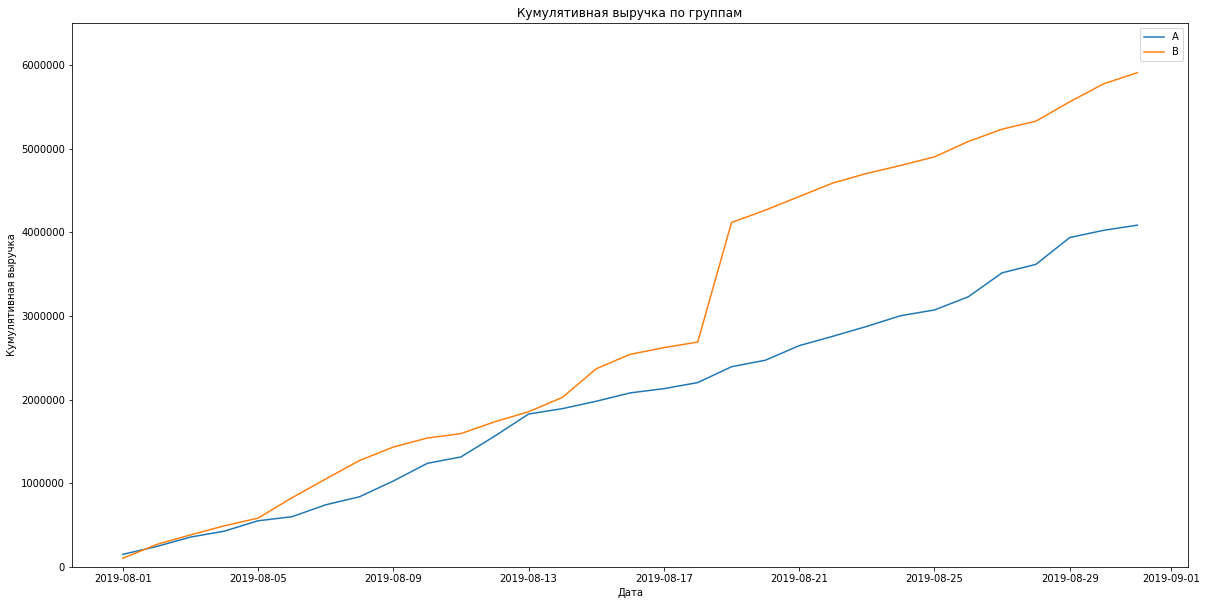

In [10]:
#Строим график кумулятивной выручки по группам
plotting_graph(cumulativeDataA, cumulativeDataB, 'Кумулятивная выручка', 'revenue', 0, 6500000)

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов. Кумулятивное значение среднего чека по группам продолжает колебаться. Принимать решение по данной выбоке преждевременно. Или требуется дополнительный анализ выбросов, которые сильно искажают результат.

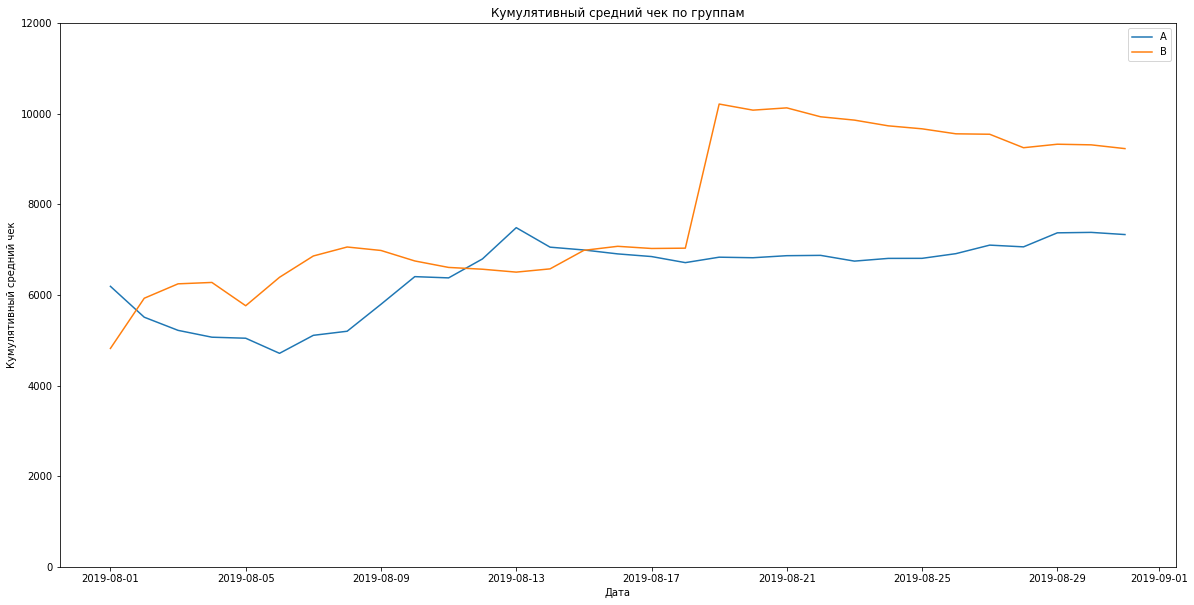

In [11]:
#Строим график кумулятивной выручки по группам
plotting_graph(cumulativeDataA, cumulativeDataB,'Кумулятивный средний чек', 'average_check', 0, 12000)

###  График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. В нескольких точках график различия между сегментами резко «скачет», поэтому можно сделать вывод, о том, что в данных существует большие заказы. При этом в какой то момент произошел резкий скачок с 13 августа 2019 год. 

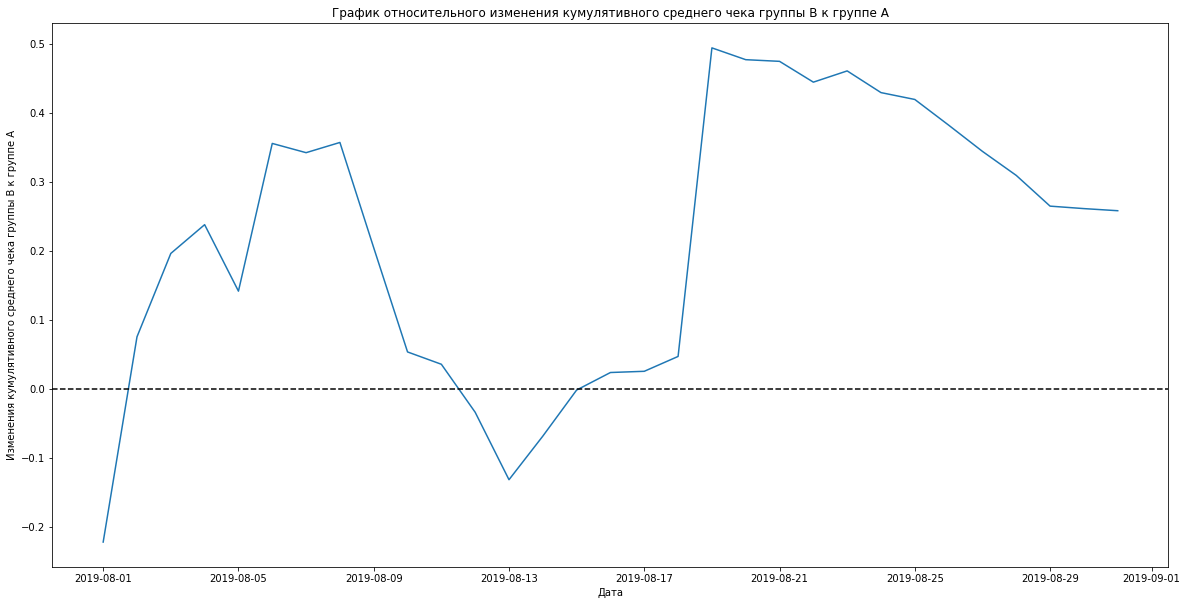

In [12]:
mergedCumulativeRevenue = cumulativeDataA.merge(
    cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20, 10))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], 
         mergedCumulativeRevenue['average_checkB']/mergedCumulativeRevenue['average_checkA'] - 1)
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--');

### График кумулятивной конверсии по группам

Построим график кумулятивной конверсии по группам. Изначально конверсия по сегменту A была выше, но потом конверсия по сегменту B, резко пошла наверх, в то время как конверсия группы B снизилась. При этом  после 8 августа графики идут практически без заметных скачков.

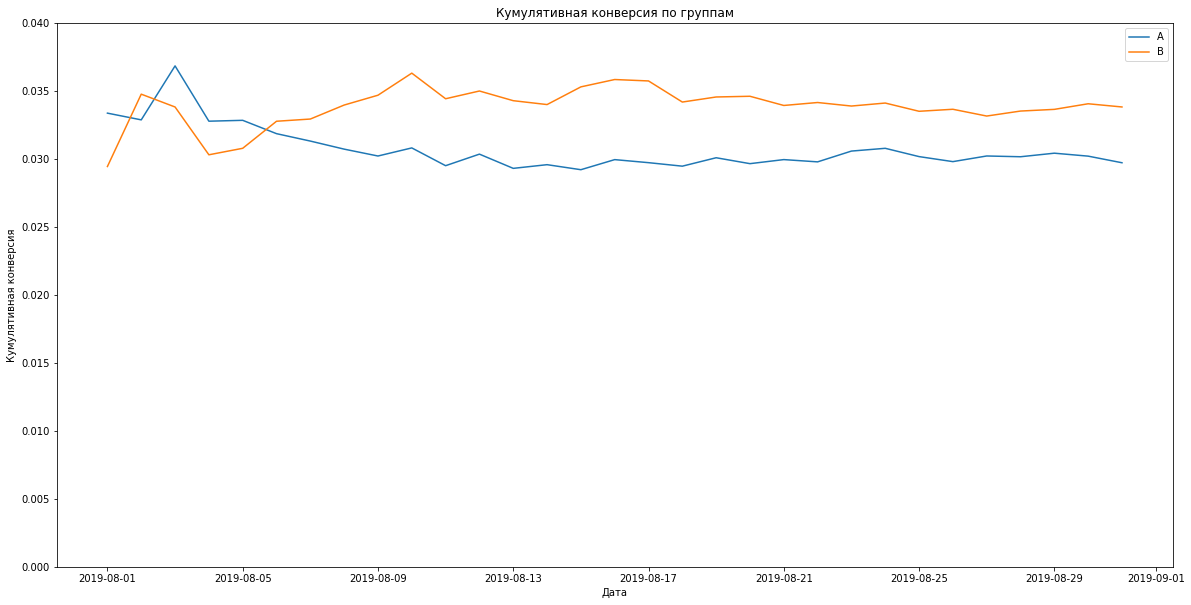

In [13]:
plotting_graph(cumulativeDataA, cumulativeDataB,'Кумулятивная конверсия', 'conversation', 0, 0.04)

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A. В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно начала расти и после 9 сентября установилось в диапазоне от 0,1 до 0,2 и осцилирует вокруг среднего значения 0,15.

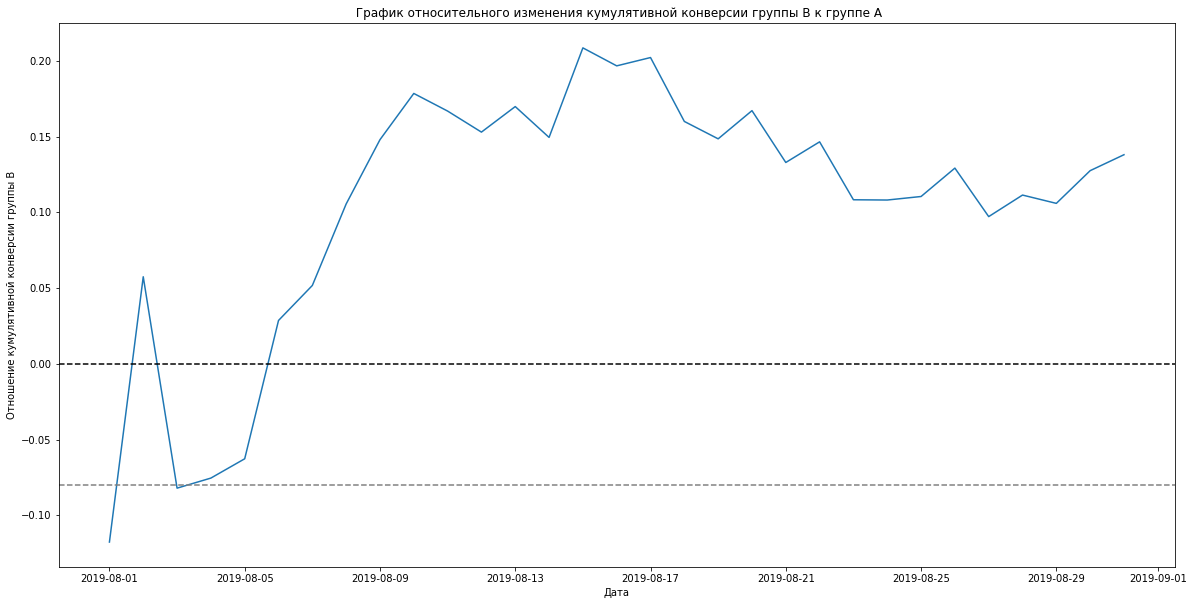

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(mergedCumulativeRevenue['date'], 
         mergedCumulativeRevenue['conversationB']/mergedCumulativeRevenue['conversationA'] - 1)
plt.title(' График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы B')
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.08, color='grey', linestyle='--');

### Точечный график количества заказов по пользователям

Для того, чтобы найти количество заказов по пользователям построили новый Series __ordersByUsers__. На основе поулченных данных 
увидим, что есть пользователи, которые совершали  5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.


In [15]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим гистрограмму распределения количества заказов на одного пользователя.Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.

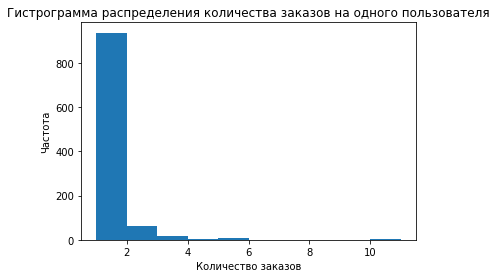

In [16]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота');

Построим точечную диаграмму числа заказов на одного пользователя. Выводы подтверждаются: много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

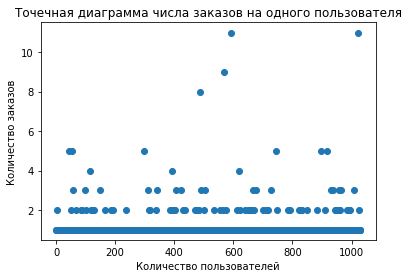

In [17]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов');

Не более 5% пользователей оформляли больше чем 2  заказов. И 1% пользователей заказывали более четырех раз.
Разумно выбрать 3 или 4 заказов на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

In [18]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

### Точечный график стоимостей заказов

Построим гистрограмму распределения стоимостей заказов на одного пользователя. В данных явно есть заказы дороже 20 000 — например, около 30 000, 50 000, 70 000 и 90 000 рублей. Однако большинство всё-таки имеет куда меньшую выручку. Большая часть данных стремятся к нулю.

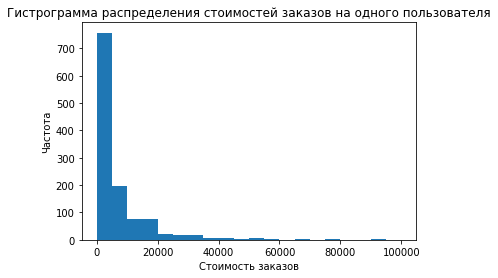

In [19]:
plt.hist(orders['revenue'], bins=20, range=(0, 100000))
plt.title('Гистрограмма распределения стоимостей заказов на одного пользователя')
plt.xlabel('Стоимость заказов')
plt.ylabel('Частота');

Построим точечный график стоимостей заказов.  На основе данного графика можно сделать вывод, что есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

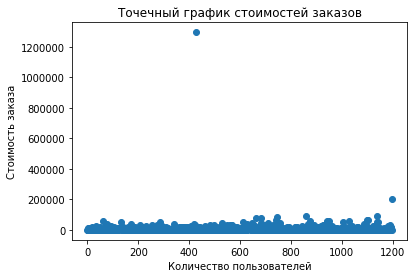

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов');
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа');

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Разумно выбрать 50 000 тыс. рублей на одного пользователя за нижнюю границу стоимости одного заказа, и отсеим аномальных пользователей по ней. 

In [21]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Для того, чтобы нам посчитать статистическую значимость различий в конверсии между группами необходимо подготовить данные. Для этого в первую очередь создадим данные по количеству пользователей в выбранную дату в группе A, по количеству пользователей в выбранную дату в группе B, количеству пользователей до выбранной даты включительно в группе A и количеству пользователей до выбранной даты включительно в группе B.

In [22]:
#Создаем visitorsDaily, в котором будет храниться количество пользователей в выбранную дату
visitorsDaily = visitors[['date', 'visitors', 'group']]
#Переименовываем столбцы
visitorsDaily.columns = ['date', 'visitorsPerDate', 'group']
#Приводим нужные столбцы к дате
visitorsDaily['date'] = pd.to_datetime(visitors['date'])
visitorsAggregated['date'] = pd.to_datetime(visitorsAggregated['date'])

#Соединяем с таблицей, в которой хранилась информация об агрегированных кумулятивных по дням данных о посетителях интернет-магазина 
visitorsCummulative = visitorsDaily.merge(visitorsAggregated, on=['date', 'group'])
visitorsCummulative.rename(columns={'visitors': 'visitorsCummulative'})

#Разделяем по сегментам, полученную таблицу
visitorsACummulative = visitorsCummulative.query('group == "A"').drop('group', axis=1)
visitorsBCummulative = visitorsCummulative.query('group == "B"').drop('group', axis=1)

#Соединяем в одну таблицу по сегментам
data = visitorsACummulative.merge(visitorsBCummulative, on='date', suffixes=['A', 'B'])
data.head()

,date,visitorsPerDateA,visitorsA,visitorsPerDateB,visitorsB
0,2019-08-01,719,719,713,713
1,2019-08-02,619,1338,581,1294
2,2019-08-03,507,1845,509,1803
3,2019-08-04,717,2562,770,2573
4,2019-08-05,756,3318,707,3280


Следующим этапом посчитаем  количество заказов в выбранную дату в группе A, суммарная выручка в выбранную дату в группе A, количество заказов в выбранную дату в группе B, суммарная выручка в выбранную дату в группе B; суммарное число заказов до выбранной даты включительно в группе A, суммарная выручка до выбранной даты включительно в группе A, суммарное количество заказов до выбранной даты включительно в группе B,суммарная выручка до выбранной даты включительно в группе B;

In [23]:
#Создадим таблицу с данными по  количеству заказов в выбранную дату и суммарная выручка в выбранную дату
ordersADaily = orders.query('group == "A"').groupby('date', as_index=False).agg({'transactionId': 'nunique', 'revenue': 'sum'})
ordersBDaily = orders.query('group == "B"').groupby('date', as_index=False).agg({'transactionId': 'nunique', 'revenue': 'sum'})

#Разделим таблицу с агрегированными кумулятивными по дням данными о заказах по сегментам
ordersAAggregated = ordersAggregated.query('group == "A"')[['date', 'transactionId', 'revenue']]
ordersBAggregated = ordersAggregated.query('group == "B"')[['date', 'transactionId', 'revenue']]

#Соединяем таблицу с данными по  количеству заказов в выбранную дату и суммарная выручка в выбранную дату по сегментам вместе
ordersDaily = ordersADaily.merge(ordersBDaily, on='date', suffixes=['A', 'B'])
ordersDaily = ordersDaily.rename(columns={'transactionIdA': 'transactionPerDateA', 'transactionIdB': 'transactionPerDateB', 'revenueA': 'revenuePerDateA', 'revenueB': 'revenuePerDateB'})

#Соединяем таблицу с данными по  количеству заказов в выбранную дату и суммарная выручка в выбранную дату по сегментам вместе
ordersAggregated = ordersAAggregated.merge(ordersBAggregated, on='date', suffixes=['A', 'B'])
ordersAggregated = ordersAggregated.rename(columns={'transactionIdA': 'transactionCummulativeA', 'transactionIdB': 'transactionCummulativeB', 'revenueA': ' revenueCummulativeA', 'revenueB': ' revenueCummulativeB'})

#Соединяем таблицы и получаем данные с количеством заказов в выбранную дату, суммарное число заказов до выбранной даты, количество выручки в выбранную дату и суммарное количество выручки
ordersAggregatedLast = ordersDaily.merge(ordersAggregated, on='date')
ordersAggregatedLast.head()

,date,transactionPerDateA,revenuePerDateA,transactionPerDateB,revenuePerDateB,transactionCummulativeA,revenueCummulativeA,transactionCummulativeB,revenueCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217
1,2019-08-02,20,93822,24,165531,44,242401,45,266748
2,2019-08-03,24,112473,16,114248,68,354874,61,380996
3,2019-08-04,16,70825,17,108571,84,425699,78,489567
4,2019-08-05,25,124218,23,92428,109,549917,101,581995


Затем соединим все полученные данные в одну большую таблицу

In [24]:
#Приводим нужный столбец 'date'
ordersAggregatedLast['date'] = pd.to_datetime(ordersAggregatedLast['date'])
data['date'] = pd.to_datetime(data['date'])

#Создаем одну большую таблицу с полученным данными по визитам, заказами доходам
data = data.merge(ordersAggregatedLast, on='date')
data.head()

,date,visitorsPerDateA,visitorsA,visitorsPerDateB,visitorsB,transactionPerDateA,revenuePerDateA,transactionPerDateB,revenuePerDateB,transactionCummulativeA,revenueCummulativeA,transactionCummulativeB,revenueCummulativeB
0,2019-08-01,719,719,713,713,24,148579,21,101217,24,148579,21,101217
1,2019-08-02,619,1338,581,1294,20,93822,24,165531,44,242401,45,266748
2,2019-08-03,507,1845,509,1803,24,112473,16,114248,68,354874,61,380996
3,2019-08-04,717,2562,770,2573,16,70825,17,108571,84,425699,78,489567
4,2019-08-05,756,3318,707,3280,25,124218,23,92428,109,549917,101,581995


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами __['userId', 'orders']__. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [25]:
#Создаем данные по количеству заказов по пользователям от сегмента A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

#Создаем данные по количеству заказов по пользователям от сегмента B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Для того чтобы начать изучать статистическую значимость других показателей создалим две функции. Одна функция будет считать нормальность распределения данных с помощью метода Шапиро-Уилка. Здесь мы выделим две гипотезы:
<b>H0</b> - данные распределены нормально<br>
<b>H1</b> - данные распределены не нормально<br>
Вторая функция будет строить проверку непараметрического теста Уилкоксона-Манна-Уитни, в случае если данные не будут относиться к непараметрическим. В данном случае у нас будет две гипотезы:<br>
<b>H0</b> -  вывод о различии сделать нельзя<br>
<b>H1</b> - разница статистически значима<br>
<br>
</div>
Так как данные относятся к непараметрическим, то будем их проверять с помощью непараметрического теста Уилкоксона-Манна-Уитни.
<br>

In [26]:
#Одна функция, которая будет считать нормальность распределения данных с помощью метода Шапиро-Уилка
def checking_normal(data):
    alpha = 0.05  # критический уровень статистической значимости

    statistic, pvalue = st.shapiro(data)

    print('p-значение: ',  pvalue)

    if  pvalue < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')
        
#строим функцию, которая будет строить проверку непараметрического теста Уилкоксона-Манна-Уитни        
def checking_mannwhitneyu(dataFirst, dataSecond):
    alpha = 0.05

    pvalue = stats.mannwhitneyu(dataFirst, dataSecond, alternative='two-sided')[1]
        
    print('p-значение: {0:.3f}'.format( pvalue))

    if  pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

Проверяем первые данные на нормальность. Проверка показала, что распределение не нормально, поэтому применяем тест Уилкоксона-Манна-Уитни

In [27]:
checking_normal(ordersByUsersA['orders'])

p-значение:  2.323212724004114e-41
Отвергаем нулевую гипотезу: распределение не нормально


Объявим переменные __sampleA__ и __sampleB__, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. С помощью данного метода проранжируем две выборки по порядку от меньшего к большему и сравним ранги одних и тех же значений, попавших в обе выборки. 

In [28]:
#Объявляем переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

checking_mannwhitneyu(sampleA, sampleB)
print("Относительное изменение кумулятивного конверсии группы B к группе A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение: 0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительное изменение кумулятивного конверсии группы B к группе A: 0.138


__Вывод:__ По «сырым» данным различия в конверсии групп A и B наблюдается, так как показатель меньше значения p-value - 0,05.
Это похоже на правду, так как средний прирост по сегменту B составляет 13,8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверяем первые данные на нормальность. Проверка показала, что распределение не нормально, поэтому применяем тест Уилкоксона-Манна-Уитни

In [29]:
checking_normal(orders[orders['group']=='A']['revenue'])

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


In [30]:
checking_mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print("Относительное изменение кумулятивного среднего чека группы B к группе A: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное изменение кумулятивного среднего чека группы B к группе A: 0.259


__Вывод:__ P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A, на 25,9%.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Найденные выше 95-й и 99-й перцентили средних чеков равны 28 000 и  58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 50 000 рублей. Так мы уберём от 1% до 5% пользователей с наибольшим числом заказов и пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — __usersWithManyOrders__ и пользователей, совершивших заказы дороже 50 000 — __usersWithExpensiveOrders__. Объединим их в таблице __abnormalUsers__. С помощью метода __shape()__ узнаем, что нашли 26 подобных пользователей.

In [31]:
#Сделаем срезы пользователей с числом заказов больше 3
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],], axis=0,)

#Сделаем срезы пользователей, совершивших заказы дороже 50 000 рублей
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']

#Объединяем их в таблице
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape

(26,)

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Проверяем полученные данные на нормальность. Проверка показала, что распределение не нормально, поэтому применяем тест Уилкоксона-Манна-Уитни.

In [32]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders',)], axis=0) 
     
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersB['orders'])), name='orders',)], axis=0)


checking_normal(ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'])


p-значение:  9.129039105536886e-41
Отвергаем нулевую гипотезу: распределение не нормально


In [33]:
checking_mannwhitneyu(sampleAFiltered, sampleBFiltered)

print("Относительное изменение кумулятивной конверсии группы B к группе A: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.007
Отвергаем нулевую гипотезу: разница статистически значима
Относительное изменение кумулятивной конверсии группы B к группе A: 0.169


Результаты по конверсии практически не изменились. Средний прирост по сегменту B увеличился и составил 16,9%.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Проверяем полученные данные на нормальность. Проверка показала, что распределение не нормально, поэтому применяем тест Уилкоксона-Манна-Уитни.

In [34]:
averageAСheck = orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue']
averageBСheck = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue']
checking_normal(averageAСheck)

p-значение:  1.1679785295849378e-28
Отвергаем нулевую гипотезу: распределение не нормально


In [35]:
checking_mannwhitneyu(averageAСheck, averageBСheck)
print("Относительное изменение кумулятивного среднего чека группы B к группе A: {0:.3f}".format(averageBСheck.mean()/averageAСheck.mean()-1)) 

p-значение: 0.819
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное изменение кумулятивного среднего чека группы B к группе A: 0.024


P-value увеличился, но и разница между сегментами сократилась с 25% до 2%. Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста

### Построение графиков по очищенным данным

Построим графики по кумулятивной выручки, по среднему чеку по группам, по кумулятивной конверсии по группам. Для этого мы очистим таблицу __order__ от заказчиков, по которым мы нашли выбросы. Затем мы сделаем новую таблицу с информацией о кумулятивных заказах, о кумулятивных доходах по датам, и рассчитаем на основе полученных данных информацию о среднем чеке и конверсии.     

In [36]:
#создаем новую таблицу с очищенными данными
orders_new = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

#создадим массив уникальных пар значений дат и групп теста
datesGroupsNew = orders_new[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregatedNew = datesGroupsNew.apply(
    lambda x: orders_new[np.logical_and(
        orders_new['date'] <= x['date'], orders_new['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), 
    axis=1
).sort_values(by=['date','group'])

ordersAggregatedNew['date'] = data['date'] = pd.to_datetime(ordersAggregatedNew['date'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeDataNew = ordersAggregatedNew.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeDataNew = ordersAggregatedNew.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeDataNew.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeDataNew['average_check'] = cumulativeDataNew['revenue'] / cumulativeDataNew['orders'] 
cumulativeDataNew['conversation'] = cumulativeDataNew['orders'] / cumulativeDataNew['visitors'] 
cumulativeDataNew.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversation
0,2019-08-01,A,23,19,142779,719,6207.782609,0.031989
1,2019-08-01,B,19,19,78258,713,4118.842105,0.026648
2,2019-08-02,A,43,37,236601,1338,5502.348837,0.032138
3,2019-08-02,B,42,41,240301,1294,5721.452381,0.032457
4,2019-08-03,A,67,61,349074,1845,5210.059701,0.036314


Разделим полученные данные по группам, с необходимыми знчениями по столбцам.

In [37]:
cumulativeDataANew = cumulativeDataNew.query('group == "A"')[['date', 'revenue', 'average_check', 'conversation']]
cumulativeDataBNew = cumulativeDataNew.query('group == "B"')[['date', 'revenue', 'average_check', 'conversation']]

Выручка почти равномерно увеличивается в течение всего теста. По графику видно, что избавились от выбросов, поэтому нигде не наблюдается выбросов по ним. Группа __B__ по выручке превышает результаты группы __A__, при этом существенно.

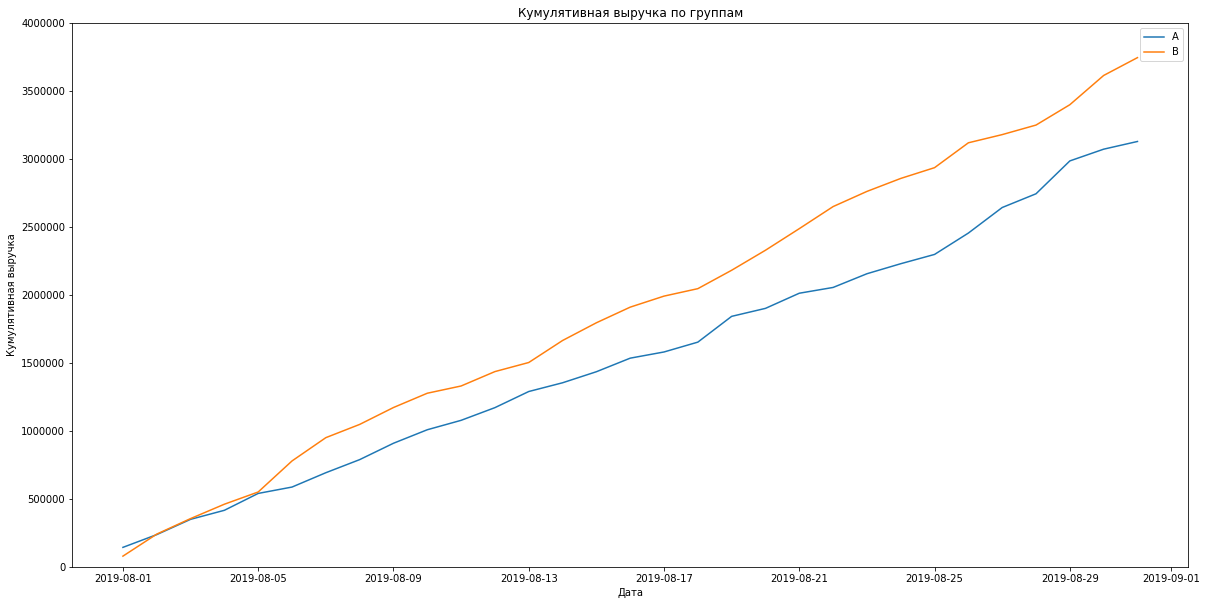

In [38]:
plotting_graph(cumulativeDataANew, cumulativeDataBNew,'Кумулятивная выручка', 'revenue', 0, 4000000)

Кумулятивное значение среднего чека по группе __B__ снизилось в связи с избавлением от выбросов, тем не менее средний чек по группе __B__ больше, чем по группе __A__ и в принципе на некотором отрезке средние чеки одинаковые. Даже можно сказать, что средний чек по группе __A__ смог подрасти, в то время как средний чек по группе __B__ снижался во времени.

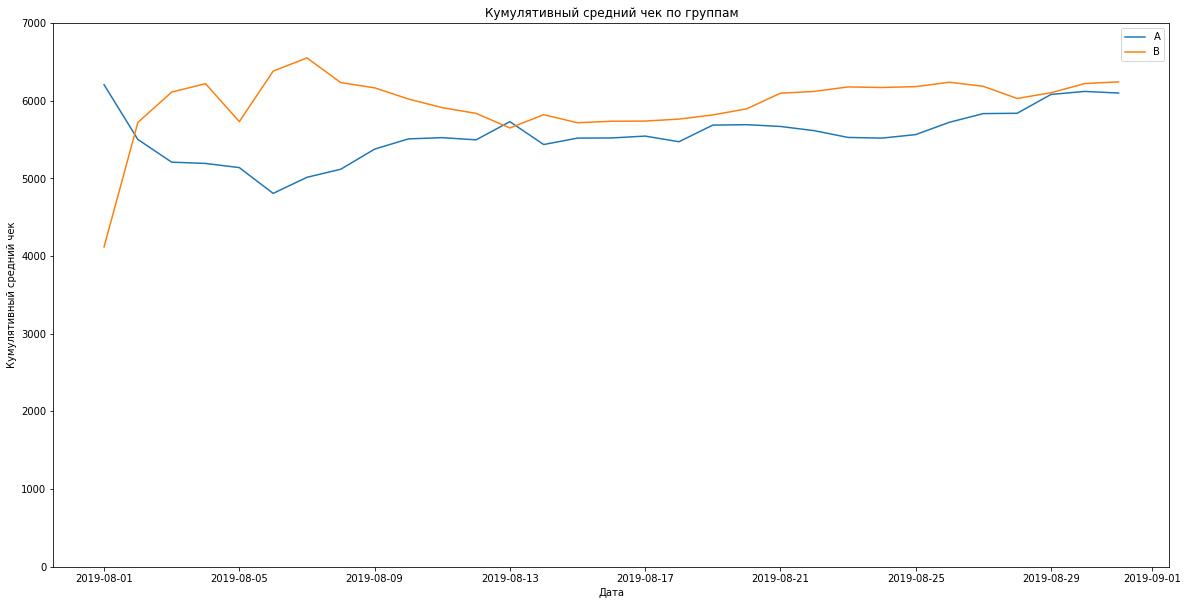

In [39]:
#Строим график кумулятивной выручки по группам
plotting_graph(cumulativeDataANew, cumulativeDataBNew,'Кумулятивный средний чек', 'average_check', 0, 7000)

График относительного изменения кумулятивного среднего чека группы B к группе A с "очищенными" данными показал, что средний чек по группе "Б" начал снижаться с 7 августа и закрепился на уровне 0,1 при этом в некоторые периоды он достиг нуля, а затем пошел наверх. 

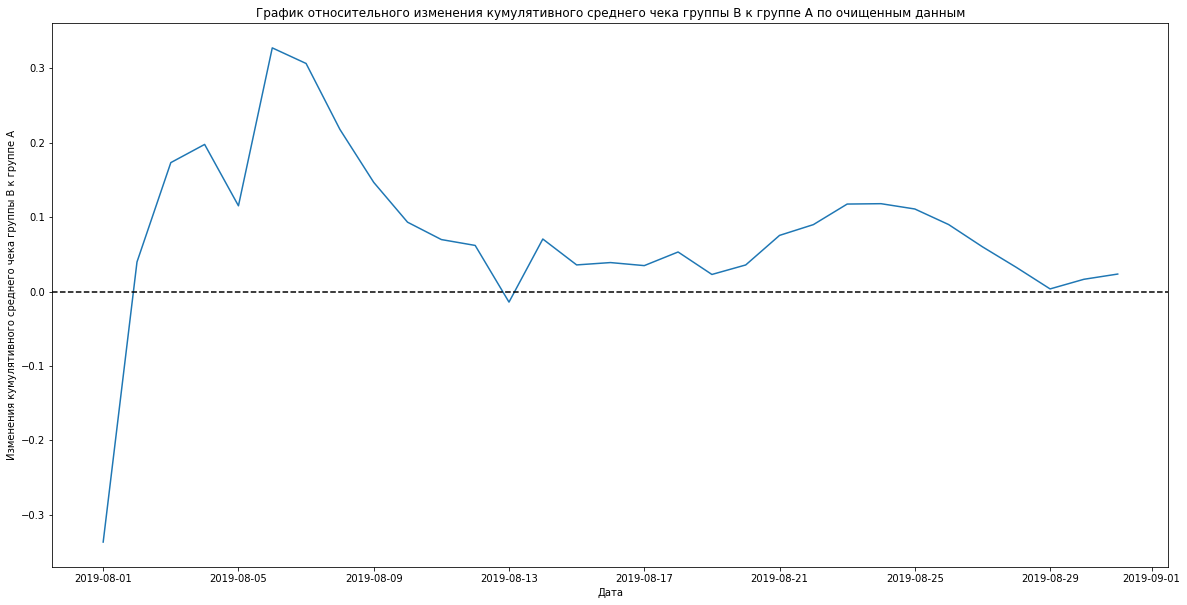

In [40]:
mergedCumulativeRevenueNew = cumulativeDataANew.merge(
    cumulativeDataBNew, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeRevenue
plt.figure(figsize=(20, 10))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A по очищенным данным')
plt.plot(mergedCumulativeRevenueNew['date'], 
         mergedCumulativeRevenueNew['average_checkB']/mergedCumulativeRevenueNew['average_checkA'] - 1)
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--');

График кумулятивной конверсии по группам с очищенными данными показал, что конверсия по группе __В__ осталась все равно выше, несмотря на то, что конверсия по очищенным данным снизилась у обих групп. 

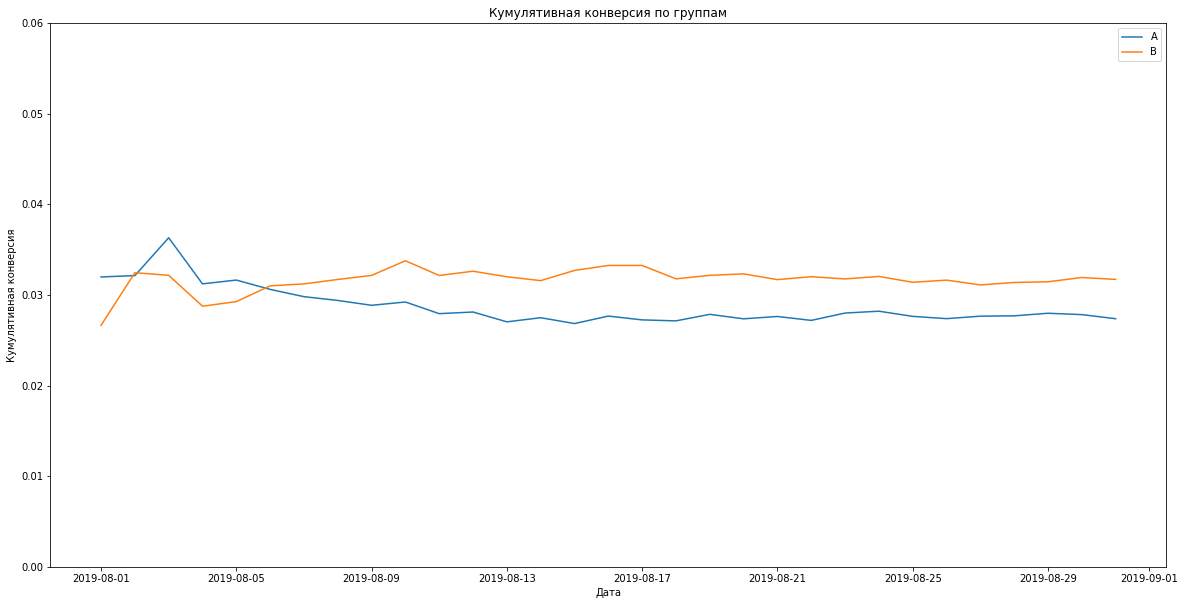

In [41]:
#Строим график кумулятивной выручки по группам
plotting_graph(cumulativeDataANew, cumulativeDataBNew,'Кумулятивная конверсия', 'conversation', 0,  0.06)

Данные, отраженные на графике относительного изменения кумулятивной конверсии группы B к группе A не сильно отличаются от подобного графика с "сырыми" данными. То есть в начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. На сегодняшний момент ее конверсия установилось в диапазоне от 0,1 до 0,2 и осцилирует вокруг среднего значения 0,15.

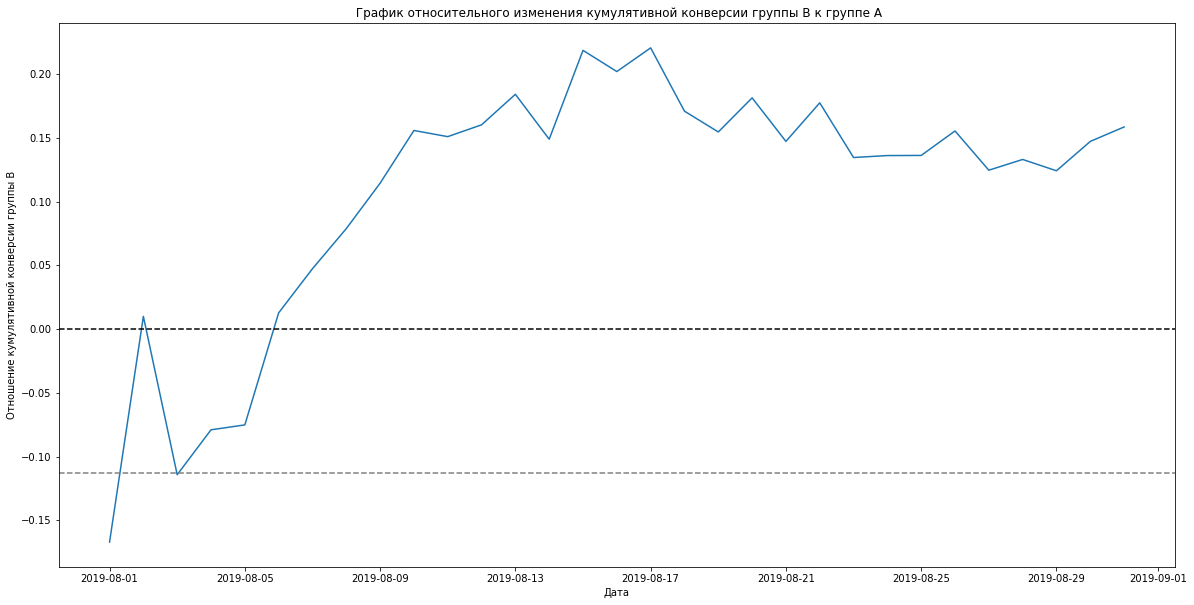

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(mergedCumulativeRevenueNew['date'], 
         mergedCumulativeRevenueNew['conversationB']/mergedCumulativeRevenueNew['conversationA'] - 1)
plt.title(' График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы B')
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.113, color='grey', linestyle='--');

Значимость результатов теста на очищеных и сырых данных не особо изменилась за исключением снижения сореднего чека по тесту __B__. В любом случае конверсия и средний чек у теста __B__ выше, что показали графики с очищенными данными.

## 3. Выводы по проекту <a name="conclusion"></a> 

Исходя из полученных данных, можно сделать следующие выводы:
- Наблюдается статистическое значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше результатов группы A, но в тоже время наблюдается тенденция к снижению;
- График различия среднего чека говорит о том, что результаты группы B показывают намного лучше результаты, чем группа A, но в тоже время они тоже снижаются.<br>
Исходя из обнаруженных фактов, тест следует остановить и признать  победу за группой B. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент A станет на самом деле лучше сегмента B — практически нулевая. В тоже время после очистки данных, наблюдается резкое снижение показателя по среднему чеку с 25% до 2%, данные показатели должны насторожить и к ним необходимо присмотреться.